<a href="https://colab.research.google.com/github/sakashSharma8msds/AlmaBetter_2024/blob/main/Eda_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Play Store App Review Analysis



##### **Project Type**    -EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - sakash sharma


# **Project Summary -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.

# **GitHub Link -**

Provide your GitHub Link here.

In [4]:
!git clone https://github.com/sakashSharma8msds/FSD_AlmaBetter.git

Cloning into 'FSD_AlmaBetter'...
fatal: could not read Username for 'https://github.com': No such device or address


https://github.com/sakashSharma8msds/AlmaBetter_2024/blob/main/Eda_play_store.ipynb

# **Problem Statement**


The objective of this EDA is to:

Identify Genre Preferences: Analyze user preferences within the Family and Game categories to understand the types of entertainment, education, and simulation experiences that appeal to a broad audience.

Evaluate Quality and Satisfaction: Explore median rating values and user feedback to assess the quality of apps and determine factors influencing positive user experiences. Continuous monitoring of reviews and feedback will provide insights for refinement and improvement.

Optimize Monetization and Marketing Strategies: Develop effective monetization and marketing strategies by understanding user preferences and behavior. This involves providing value to users through premium features, leveraging positive reviews for promotional purposes, and attracting new users in the competitive app market.

#### **Define Your Business Objective?**

 Absolutely, exploratory data analysis (EDA) plays a crucial role in guiding future app recommendations by providing valuable insights into user preferences and behaviors.

 business objective is to increase app user engagement, especially within specific genres identified as popular among users, here are some recommendations tailored to top genres.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [6]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
playstore=pd.read_csv('/content/drive/MyDrive/PORTFOLIO/EDA/Play_store/Play Store Data.csv')
reviews=pd.read_csv('/content/drive/MyDrive/PORTFOLIO/EDA/Play_store/User Reviews.csv')

### Dataset First View

In [8]:
# Dataset First Look

playstore.head(5)  #play store data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
new_value_1019=playstore[playstore["Last Updated"]=='1.0.19'][[ 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver']].apply(lambda x : x.shift(1),axis=1).values

In [10]:
reviews.head(5)  #review data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print("play store \nRows:{}  Columns:{}\n\n".format(playstore.shape[0],playstore.shape[1]))
print("reviews \nRows:{}  Columns:{}\n\n".format(reviews.shape[0],reviews.shape[1]))

play store 
Rows:10841  Columns:13


reviews 
Rows:64295  Columns:5




### Dataset Information

In [12]:
# Dataset Info
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count

playstore.duplicated().sum() #play store

483

In [15]:
reviews.duplicated().sum() #reviews data

33616

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [18]:
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

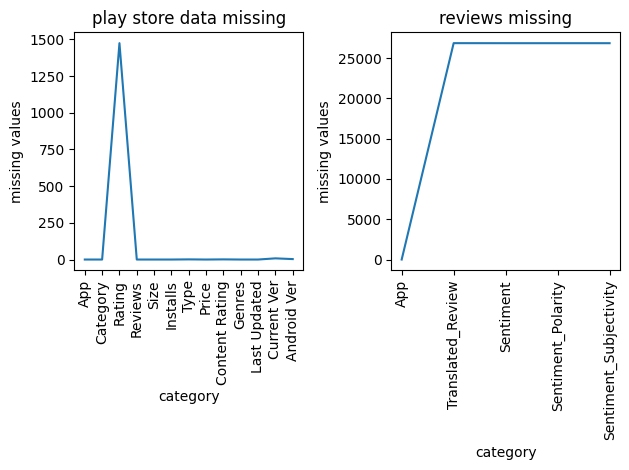

In [19]:
# Visualizing the missing values
fig_1=plt.figure()
ax1=fig_1.add_subplot(1,2,1)
plt.xticks(rotation=90)
ax1.plot(playstore.isna().sum())
ax1.set_title('play store data missing')  # Setting title for the first subplot
ax1.set_xlabel('category')   # Setting x-axis label for the first subplot
ax1.set_ylabel('missing values')   # Setting y-axis label for the first subplot

ax2=fig_1.add_subplot(1,2,2)
plt.xticks(rotation=90)
ax2.plot(reviews.isna().sum())
ax2.set_title('reviews missing')  # Setting title for the second subplot
ax2.set_xlabel('category')       # Setting x-axis label for the second subplot

ax2.set_ylabel('missing values')      # Setting y-axis label for the second subplot

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The Playstore dataset comprises 10,841 rows and 13 columns. Among these, over 1400 values in the 'Rating' column are marked as Null, and there are 483 duplicated entries.

The reviews dataset consists of 64,295 rows and 5 columns. Within this dataset, more than 25,000 values in the 'translated_review,' 'sentiment,' 'sentiment_polarity,' and 'sentiment_subjectivity' columns are recorded as Null. Additionally, there are 33,616 instances of duplicated values within this dataset.


## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [22]:
# Dataset Describe

playstore.describe()  # play_store

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [23]:
reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# **Play store dataset**

**App**: Name of the app

**Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.

**Rating**: The current average rating (out of 5) of the app on Google Play

**Reviews**: Number of user reviews given on the app

**Size**: Size of the app in MB (megabytes)

**Installs**: Number of times the app was downloaded from Google Play

**Type**: Whether the app is paid or free

**Price**: Price of the app in US$

**Last Updated**: Date on which the app was last updated on Google Play






# ***Reviews dataset variable***

**App**:Name of the app

**Translated_Review**:customer review on text

**Sentiment**:positive or negative

**Sentiment_Polarity**:Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.
       
**Sentiment_Subjectivity**:Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment.





### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
print("unique values in playstore by column")
for i in playstore.columns:
  print('  No. of unique values in',i,":{}".format(playstore[i].nunique()))
print("\nunique values in reviews by column")
for j in reviews.columns:
  print('  No. of unique values in',j,":{}".format(reviews[j].nunique()))

unique values in playstore by column
  No. of unique values in App :9660
  No. of unique values in Category :34
  No. of unique values in Rating :40
  No. of unique values in Reviews :6002
  No. of unique values in Size :462
  No. of unique values in Installs :22
  No. of unique values in Type :3
  No. of unique values in Price :93
  No. of unique values in Content Rating :6
  No. of unique values in Genres :120
  No. of unique values in Last Updated :1378
  No. of unique values in Current Ver :2832
  No. of unique values in Android Ver :33

unique values in reviews by column
  No. of unique values in App :1074
  No. of unique values in Translated_Review :27994
  No. of unique values in Sentiment :3
  No. of unique values in Sentiment_Polarity :5410
  No. of unique values in Sentiment_Subjectivity :4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
 #FIRST STEP DATA CLEANING


df=playstore.drop_duplicates(inplace=False) #  df save dataset Playstore without duplicated
df1=reviews.drop_duplicates(inplace=False)  # df save dataset Reviews without


print("duplicated values after cleaning  below:","\n play_store_dataset={}\n reviews dataset={}".format(df.duplicated().sum(),df1.duplicated().sum()))

duplicated values after cleaning  below: 
 play_store_dataset=0
 reviews dataset=0


In [26]:
median_rating=df[df['Rating']!=np.nan].median()
print(median_rating)
df['Rating'].fillna(median_rating,inplace=True)

Rating    4.3
dtype: float64


<ipython-input-26-f6bf7ffc8dc7>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_rating=df[df['Rating']!=np.nan].median()
<ipython-input-26-f6bf7ffc8dc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'].fillna(median_rating,inplace=True)


In [27]:
df.dropna(inplace=True)
df1.dropna(inplace=True)
print("Null values in the after cleaning  below:","\n play_store_dataset=\n{}\n\n reviews dataset=\n{}".format(df.isna().sum(),df1.isna().sum()))

Null values in the after cleaning  below: 
 play_store_dataset=
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

 reviews dataset=
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


<ipython-input-27-645c543e4187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-27-645c543e4187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [28]:
df['Reviews']=df['Reviews'].astype(float)  # changing dtype of column Reviews

<ipython-input-28-7dd294228d12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews']=df['Reviews'].astype(float)  # changing dtype of column Reviews


In [29]:
def replace_Size_into_MB(value):
    if 'K' in value:
      return float(value.replace('K', ''))/1024
    elif "M" in value:
      return float(value.replace('M',''))
    elif value=='Varies with device':
      return 0.0

df['Size']=df['Size'].apply(replace_Size_into_MB)
# Convert size into Megabyte

<ipython-input-29-7fe4c42f8321>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size']=df['Size'].apply(replace_Size_into_MB)


In [30]:
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(np.float64)
# Atleast installs

<ipython-input-30-40e8ef1fb411>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(np.float64)
<ipython-input-30-40e8ef1fb411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(np.float64)


In [31]:
#change price in dollar (float dtype)
def price_dollar(pricex):
  if '$' in pricex:
    return float(pricex.replace('$',''))
  else:
    return float(pricex)

df['Price']=df['Price'].apply(price_dollar)

<ipython-input-31-ac12bccb665d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(price_dollar)


In [32]:
# Custom function to convert versions to unified format
def simplify_version(version):
    if version !='Varies with device':
      return float(version[:3])
    else:
      return 0.0

df['Android Ver']=df['Android Ver'].apply(simplify_version)
Android_median=pd.Series([x for x in df['Android Ver']!=0.0]).median()
df['Android Ver']=df['Android Ver'].replace(0.0,Android_median)

<ipython-input-32-28a14af47754>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Android Ver']=df['Android Ver'].apply(simplify_version)
<ipython-input-32-28a14af47754>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Android Ver']=df['Android Ver'].replace(0.0,Android_median)


In [33]:
#Modify Last Update column to time
df['Last Updated']=pd.to_datetime(df['Last Updated'])

<ipython-input-33-5f2da3118923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Updated']=pd.to_datetime(df['Last Updated'])


In [34]:
#dataset after modification
df.pop("Current Ver")

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10834                 1.0.0
10836                  1.48
10837                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 8886, dtype: object

In [35]:
# modify Rating
df["Content Rating"]=df["Content Rating"].replace('Everyone 10+','Teen').replace('Adults only 18+','Adults').replace('Mature 17+','Mature')

<ipython-input-35-e595b88b988c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Content Rating"]=df["Content Rating"].replace('Everyone 10+','Teen').replace('Adults only 18+','Adults').replace('Mature 17+','Mature')


In [36]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

<ipython-input-36-fa5905be3f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-36-fa5905be3f7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


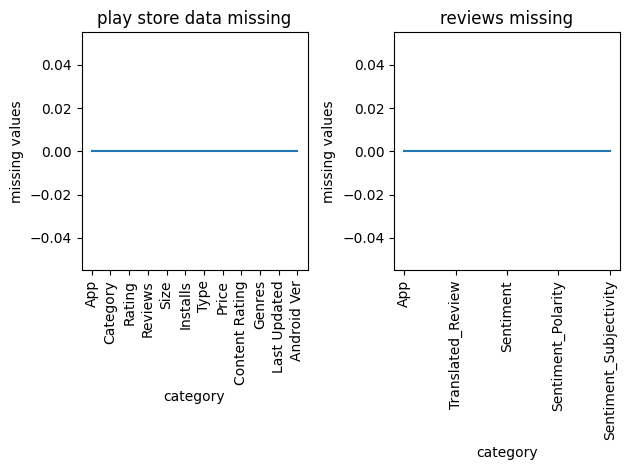

In [37]:
# Visualizing the missing values
fig_1=plt.figure()
ax1=fig_1.add_subplot(1,2,1)
plt.xticks(rotation=90)
ax1.plot(df.isna().sum())
ax1.set_title('play store data missing')  # Setting title for the first subplot
ax1.set_xlabel('category')   # Setting x-axis label for the first subplot
ax1.set_ylabel('missing values')   # Setting y-axis label for the first subplot

ax2=fig_1.add_subplot(1,2,2)
plt.xticks(rotation=90)
ax2.plot(df1.isna().sum())
ax2.set_title('reviews missing')  # Setting title for the second subplot
ax2.set_xlabel('category')       # Setting x-axis label for the second subplot

ax2.set_ylabel('missing values')      # Setting y-axis label for the second subplot

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

In [38]:
result_outer = pd.merge(df, df1, on='App', how='inner')  # merging two table in one so, handing data would be easy.

In [39]:
result_outer.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40136,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,1.0,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
40137,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,1.0,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
40138,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,1.0,Too much ads,Positive,0.200000,0.200000
40139,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,1.0,Just allow time ...,Neutral,0.000000,0.000000


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

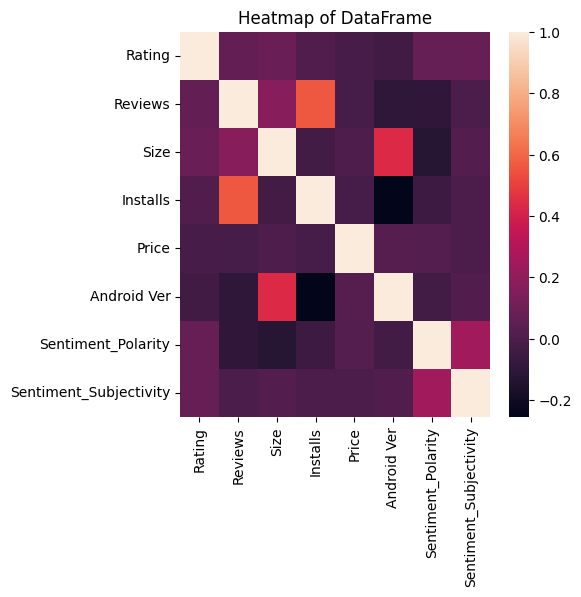

In [40]:
# Chart - 1 visualization code

# understand relation between columns
columns_hv_float=['Rating', 'Reviews', 'Size', 'Installs','Price','Android Ver', 'Sentiment_Polarity','Sentiment_Subjectivity']
for_heatmap=result_outer[columns_hv_float]
corr_heatmap=for_heatmap.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_heatmap)
plt.title('Heatmap of DataFrame')
plt.show()


In [41]:
corr_heatmap

,Rating,Reviews,Size,Installs,Price,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.067839,0.083614,0.006770,-0.019324,-0.038144,0.075005,0.074684
Reviews,0.067839,1.000000,0.172696,0.560303,-0.020086,-0.101388,-0.094638,-0.007356
Size,0.083614,0.172696,1.000000,-0.033517,0.001665,0.435551,-0.127252,0.016366
Installs,0.006770,0.560303,-0.033517,1.000000,-0.023504,-0.254802,-0.053848,-0.004262
Price,-0.019324,-0.020086,0.001665,-0.023504,1.000000,0.029103,0.022152,-0.000493
Android Ver,-0.038144,-0.101388,0.435551,-0.254802,0.029103,1.000000,-0.030079,0.006157
Sentiment_Polarity,0.075005,-0.094638,-0.127252,-0.053848,0.022152,-0.030079,1.000000,0.245330
Sentiment_Subjectivity,0.074684,-0.007356,0.016366,-0.004262,-0.000493,0.006157,0.245330,1.000000


##### 1. Why did you pick the specific chart?


Use of heatmap is to understand the correlation between the columns.

##### 2. What is/are the insight(s) found from the chart?

correlated columns:

1.reviews and install

2.size and android version  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, correlation but columns help in developing machine learning model for good business.

#### Chart - 2

([<matplotlib.patches.Wedge at 0x7b8fec5a8250>,
 [Text(0.9252221873833926, 0.5949486565860037, 'FAMILY'),
  Text(0.1058260748886533, 1.0948976399068826, 'GAME'),
  Text(-0.5074246628505927, 0.9759714194232136, 'TOOLS'),
  Text(-0.8321305295764472, 0.7194155834751021, 'MEDICAL'),
  Text(-0.9926802140046957, 0.473905046104799, 'BUSINESS'),
  Text(-0.1709601205170879, -1.086633626017888, 'OTHER')],
 [Text(0.5046666476636686, 0.32451744904691104, '18.2%'),
  Text(0.05772331357562906, 0.5972168944946631, '10.6%'),
  Text(-0.276777088827596, 0.5323480469581164, '7.8%'),
  Text(-0.45388937976897115, 0.3924085000773284, '4.3%'),
  Text(-0.5414619349116522, 0.25849366151170855, '4.2%'),
  Text(-0.09325097482750247, -0.5927092505552115, '55.0%')])

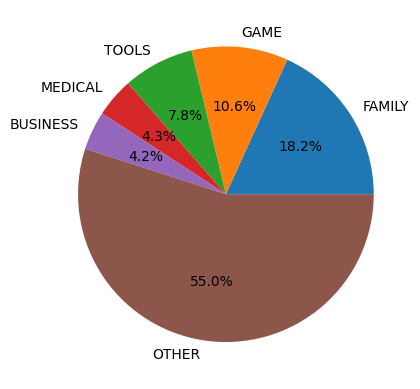

In [42]:

chart_2=playstore['Category'].value_counts()
x=chart_2.values
top_5_value=list(x[:5])
top_5_character=list(chart_2.index[:5])
other_=x[5:].sum()
total=x.sum()
top_5_character.insert(5,'OTHER')  # top category
top_5_value.insert(5,other_)
plt.pie(top_5_value,labels=top_5_character,autopct='%0.1f%%')

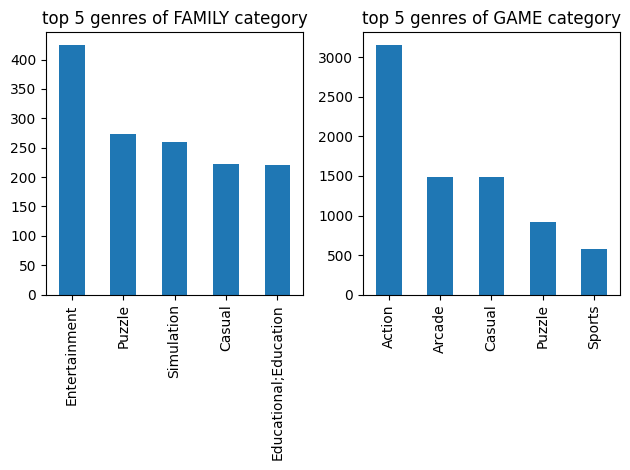

In [43]:
#sub_plot genres of top 5 category

#sub_plot 1
plt.subplot(1,2,1)
result_outer[result_outer['Category']=='FAMILY']['Genres'].value_counts()[:5].plot(kind='bar')
plt.title('top 5 genres of FAMILY category')


#sub_plot 1
plt.subplot(1,2,2)
result_outer[result_outer['Category']=='GAME']['Genres'].value_counts()[:5].plot(kind='bar')
plt.title('top 5 genres of GAME category')





# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 Categories help in understanding the segmentation of the market. They provide insights into which types of apps are more prevalent or popular in the store.

 Categorization can be used as a basis for building recommendation systems. By understanding which categories are related or have similar user bases, personalized recommendations can be generated more effectively.

##### 2. What is/are the insight(s) found from the chart?

top 2 categories Family,Game,Tool.

To provide the top genres within categories  Family and Game from the Play Store dataset give below:   

*   family-entertainment, education and simulation
*   game- action, arcade and casual
















##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Categorization can be used as a basis for building recommendation systems. By understanding which categories are related or have similar user bases, personalized recommendations can be generated more effectively.

    

#### Chart - 3

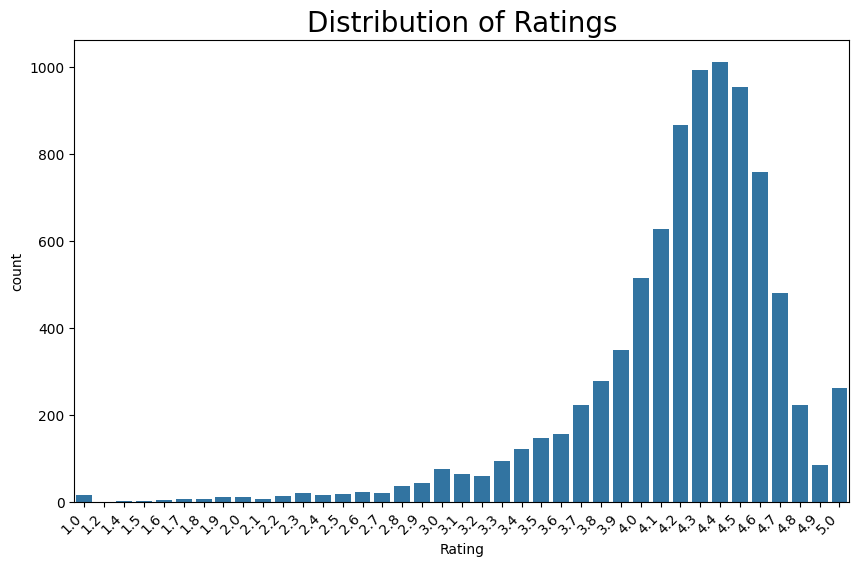

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Rating"])
plt.title("Distribution of Ratings",fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.show()

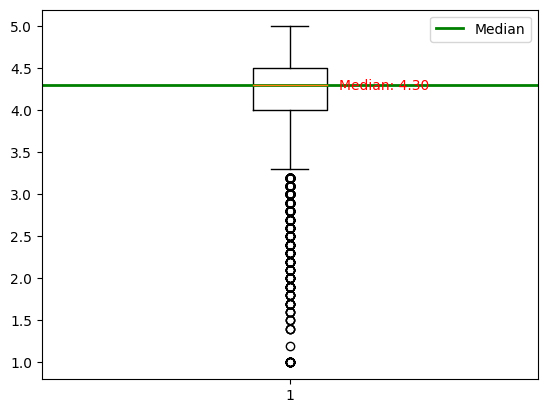

In [45]:
plt.boxplot(df["Rating"])
median=df['Rating'].median()
plt.axhline(y=median, color='g', linestyle='-', linewidth=2, label='Median')

# Annotate median value numerically
plt.text(1.1, median, f'Median: {median:.2f}', color='r', fontsize=10, verticalalignment='center')

# Add legend
plt.legend()

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

the Rating column for EDA in a Play Store dataset can provide valuable insights into user satisfaction, app quality, competitive positioning, and market trends, making it a crucial aspect of data analysis in the app ecosystem.

##### 2. What is/are the insight(s) found from the chart?

The median value, in this case, is 4.30. This mean that 50%(IQR) of the data points in the dataset fall between 4.5 and 4.0.
It serves as a robust measure of central tendency, especially in the presence of outliers, as it is not influenced by extreme values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

You can compare the application's rating with the ratings of other applications within the same category or genre. If the application's rating is similar to or higher than the median rating of other applications in its category, it may be considered good in comparison.

#### Chart - 4

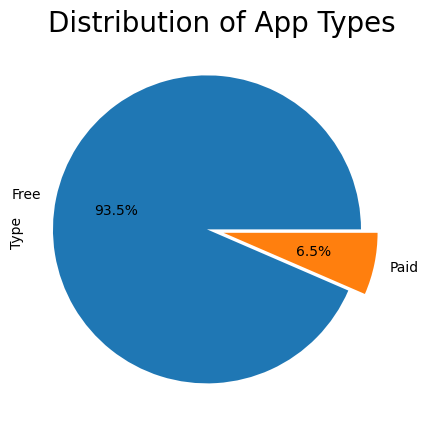

In [46]:
# Chart - 4 visualization code

df["Type"].value_counts().plot.pie(figsize=(5,5),explode=(0.1,0.01),autopct="%1.1f%%")
plt.title("Distribution of App Types",fontsize=20)
plt.show()

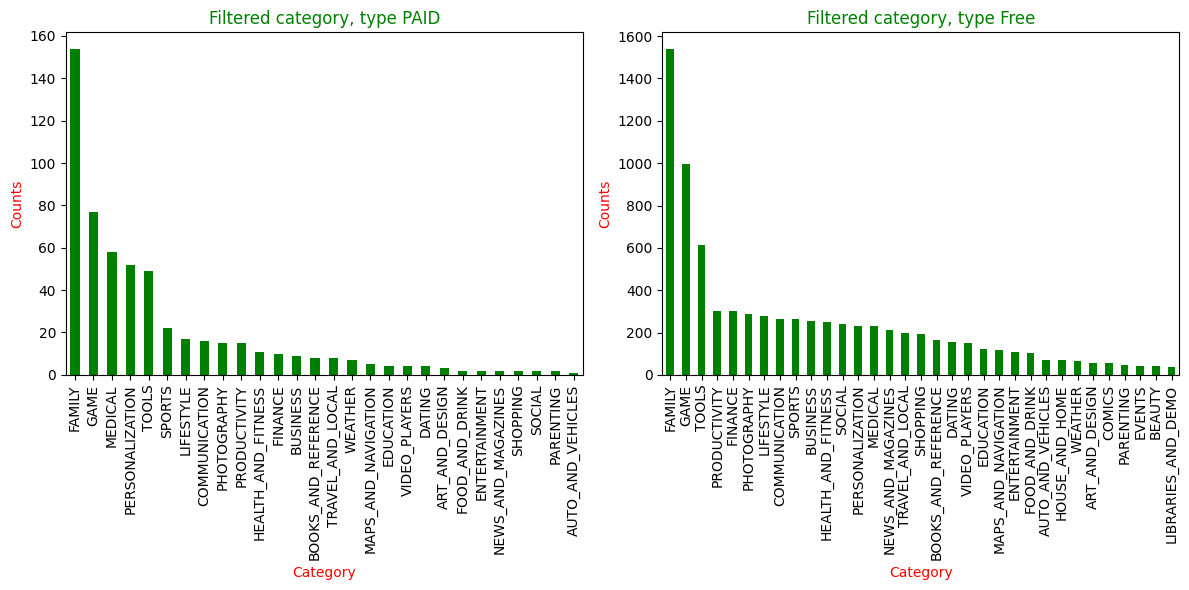

In [47]:
plt.figure(figsize=(12, 6))

# subplot 1
plt.subplot(1,2,1)
df[df['Type']=="Paid"]['Category'].value_counts().plot(kind='bar',color='g')
plt.title('Filtered category, type PAID', color='g')
plt.xlabel('Category',color='r')
plt.ylabel('Counts',color='r')

# subplot 2
plt.subplot(1,2,2)
df[df['Type']=="Free"]['Category'].value_counts().plot(kind='bar',color='g')
plt.title('Filtered category, type Free', color='g')
plt.xlabel('Category',color='r')
plt.ylabel('Counts',color='r')


# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts effectively represent proportions of a whole. In this case, it clearly shows what percentage of the total applications are paid.


##### 2. What is/are the insight(s) found from the chart?


The pie chart depicts that only 6.9 percentage  of the applications are paid. The subplot analysis by category of paid applications reveals that the first two categories are common, but they have different ratings, namely personalization and medical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5

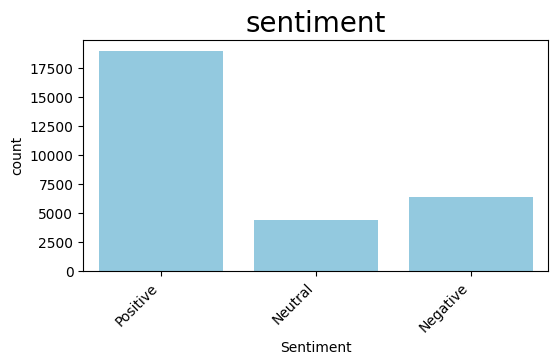

In [48]:
# Chart - 5 visualization code
plt.figure(figsize=(6,3))
sns.countplot(x=df1['Sentiment'],color='skyblue')
plt.title("sentiment",fontsize=20)
plt.xticks(rotation=45, ha="right")


plt.show()




##### 1. Why did you pick the specific chart?


To understand how many positive reviews there are in a dataset

##### 2. What is/are the insight(s) found from the chart?

In the bar plot illustrating review counts, the bar representing positive reviews is notably taller than those representing negative and neutral reviews. Specifically, positive reviews exceed 17,500, while negative reviews are fewer than 7,500, and neutral reviews are capped at 5,000.

  The bar representing positive reviews is the tallest, indicating that the majority of reviews for the app are positive




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that the majority of reviews are positive can reinforce confidence in the app's quality and functionality. This positive sentiment can attract new users and retain existing ones, leading to increased user engagement and loyalty.

While positive reviews are valuable, negative and neutral feedback also offer opportunities for improvement. Analyzing negative and neutral reviews can identify areas for enhancement, bug fixes, or new feature development, leading to a better user experience and more positive reviews over time.

#### Chart - 6

In [ ]:
# Pair Plot visualization code
sns.pairplot(result_outer)

##### 1. Why did you pick the specific chart?

A pair plot is a powerful visualization tool that allows us  to explore relationships between multiple variables in a dataset. It's particularly useful when you have several numeric variables and want to visualize their pairwise relationships.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Introduction:
In today's highly competitive app market, understanding user behavior and preferences is crucial for maximizing app performance and ensuring user satisfaction. By analyzing various data points such as correlation analysis, genre preferences, median ratings, paid vs. free applications, and review counts, we can derive actionable insights to optimize our app offerings and strategies.

Key Actions:

Optimize Compatibility and Engagement:
Utilize correlation analysis to understand the relationship between reviews, installs, app size, and Android version compatibility. Focus on developing and promoting apps that are compatible with popular Android versions and devices, as this positively impacts user engagement and installs. Implement strategies to encourage user reviews, as higher review counts correlate with increased installs.

Tailor Offerings Based on Genre Preferences:
Recognize the top genres within each category, especially in Family and Game categories. Develop and promote apps that align with popular genres such as Entertainment, Education, Action, and Arcade. Tailor marketing efforts and app development to cater to user preferences, ultimately improving user acquisition and retention.

Maintain High Quality and Positive User Experience:
Use median ratings as a benchmark to gauge user satisfaction and app quality. Strive to maintain ratings above the median value by continuously improving app features, functionality, and user experience. Prioritize user feedback and address any issues promptly to ensure positive reviews and overall app success.

Implement Effective Monetization Strategies:
Analyze the distribution of paid applications across different categories to identify lucrative opportunities for monetization. Consider pricing strategies and monetization models tailored to specific app categories, such as offering premium features or ad-free versions in categories with a high presence of paid apps.

Focus on Positive User Feedback and Reputation Management:
Leverage review counts analysis to monitor user feedback and sentiment. Emphasize maintaining a positive user experience to drive positive reviews and enhance app reputation. Implement strategies to address negative feedback and improve app performance, ultimately fostering user satisfaction and loyalty.

# **Conclusion**

By leveraging data insights and implementing strategic actions based on correlation analysis, genre preferences, median ratings, paid vs. free applications, and review counts, we can optimize app performance, enhance user satisfaction, and drive overall success in the competitive app market. Continuously monitor and adapt strategies based on evolving user preferences and market trends to stay ahead of the competition.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***